Adding imports to this section as they are needed

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as ticker
import pandas as pd

This is the function to create a plot bubble chart

In [100]:
def plot_bubble_chart(x_value_1, x_value_2, bubble_mag_1, bubble_mag_2, series_name_1, series_name_2, chart_title, x_axis_label):

    '''Plots two datasets in a bubble chart with the magnitude shown as an average
    
    Parameters:
    x_value_1: is the array of x values for the first dataset n/
    x_value_2: is the array of x values for the first dataset
    bubble_mag_1: is the array of values that will be used for the size of the bubbles in the first dataset
    bubble_mag_2: is the array of values that will be used for the size of the bubbles in the second dataset
    series_name_1: is the name of the first dataseries that will be used on the chart
    series_name_2: is the name of the second dataseries that will be used on the chart
    chart_title: is the title of the chart that will display
    x_axis_lable: is the text that will show along the x axis

    Returns:
    None
    '''
    fig, ax = plt.subplots()

    # Calculate total magnitude for each dataset 
    total_mag_1 = np.sum(bubble_mag_1)
    total_mag_2 = np.sum(bubble_mag_2)

    #Calculate a percentage array based on the totals above
    percentage_1 = (bubble_mag_1 / total_mag_1) * 100  
    percentage_2 = (bubble_mag_2 / total_mag_2) * 100  

    # Normalizing the sizes to be proportional to their value
    bubble_size_factor = 500  
    sizes_1 = percentage_1 * bubble_size_factor
    sizes_2 = percentage_2 * bubble_size_factor
    
    y_values_1 = array = np.full(len(x_value_1), 1)
    y_values_2 = array = np.full(len(x_value_2), 2)

    # Plot dataset 1
    scatter1 = ax.scatter(x_value_1, y_values_1, s=sizes_1, c='b', alpha=0.5, label='Cost Set 1')

    # Plot dataset 2
    scatter2 = ax.scatter(x_value_2, y_values_2, s=sizes_2, c='g', alpha=0.5, label='Cost Set 2')

    # Adjust the y-axis limits to add space above and below the data
    ax.set_ylim(0, 3)  # Add space above and below the data

    # Set different datasets
    ax.set_yticks([1, 2])
    plt.xticks(rotation=90)
    ax.set_yticklabels([series_name_1, series_name_2])
        
    # Add labels and title
    ax.set_title(chart_title)
    ax.set_xlabel(x_axis_label)

This is the function to plot a line chart

In [101]:
def plot_line_chart(x_value_1,x_value_2,y_values_1,y_values_2, data_label_1, data_label_2,x_label,y_label,chart_title):

    '''creates a line chart (assumes y is currency and x is a date)'''
    # Create the plot
    fig, ax = plt.subplots()

    # Plot dataset 1
    ax.plot(x_value_1, y_values_1, marker='o', linestyle='-', color='b', label=data_label_1)

    # Plot dataset 2
    ax.plot(x_value_2, y_values_2, marker='s', linestyle='--', color='g', label=data_label_2)

    # Format the y-axis as currency
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

    # Adding labels, title, and legend
    plt.title(chart_title)
    plt.xlabel(x_label)
    plt.xticks(rotation=90)
    plt.ylabel(y_label)
    plt.legend()



This is temporary code in order to manually test out the plotting capability. Saving it in case it is needed later on

In [102]:
'''#Run bubble chart example
y_values_1 = [1,5,8,12,2,6,8,0,1,10] #Represents costs
y_values_2 = [2,6,3,11,12,2,6,3,3,9] #Represents costs
x_values_1 = [1,2,3,4,5,6,7,8,9,10] #Represents time
x_values_2 = [3,4,5,6,7,8,9,10,11,12] #Represents time

plot_bubble_chart(x_values_1, x_values_2, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")


#Run Line chart example
y_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs
y_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs

plot_line_chart(x_values_1, x_values_2, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")'''

'#Run bubble chart example\ny_values_1 = [1,5,8,12,2,6,8,0,1,10] #Represents costs\ny_values_2 = [2,6,3,11,12,2,6,3,3,9] #Represents costs\nx_values_1 = [1,2,3,4,5,6,7,8,9,10] #Represents time\nx_values_2 = [3,4,5,6,7,8,9,10,11,12] #Represents time\n\nplot_bubble_chart(x_values_1, x_values_2, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")\n\n\n#Run Line chart example\ny_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs\ny_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs\n\nplot_line_chart(x_values_1, x_values_2, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")'

This is to import a file, I would like to have this as a user uploadable file in the UX eventually. 

In [103]:


# Import CSV file
df = pd.read_csv('sample data/Cost and Schedule Data.csv')
# TODO: add debugging. check for required column headers and column formatting  


This takes the imported data and applies filters, sorts by date, and creates the arrays needed to plot the data. Currently this is taking in two datasets rather than creating a second dataset

In [104]:
def prep_import_data(df,filter_column_array,filter_value_array):
    '''modified imported data for use with plot functions. Must have the 
    following columns: Dataset, Build Cost, Need Date
    filter_column_array is an array of column names to be filtered
    filter_value_array is an array of the values to filter corresponding columns by'''
    
    #filter data based on inputs
    filtered_df = df

    #loops through both arrays at the same time
    for col, val in zip(filter_column_array, filter_value_array):
        filtered_df = filtered_df[filtered_df[col]== val]

    #Sort the data by date
    filtered_df.sort_values('Need Date', inplace=True)

    #Create Dataset_1 arrays
    dataset_1 = filtered_df[filtered_df['Dataset'] == "Baseline"] #Represents costs
    y_values_1 = dataset_1['Build Cost']
    x_values_1 = dataset_1['Need Date']
    x_values_fmt_1 = pd.to_datetime(x_values_1,origin='1899-12-30', unit='D')

    #Create Dataset_2 arrays
    dataset_2 = filtered_df[filtered_df['Dataset'] == "Current"] #Represents costs
    y_values_2 = dataset_2['Build Cost']
    x_values_2 = dataset_2['Need Date']
    x_values_fmt_2 = pd.to_datetime(x_values_2,origin='1899-12-30', unit='D')

    #Plot bubble chart
    plot_bubble_chart(x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")


    #Run Line chart 
    y_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs
    y_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs

    plot_line_chart(x_values_fmt_1, x_values_fmt_2, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")

    return x_values_fmt_1, x_values_fmt_2, y_values_1,  y_values_2, y_value_cum_1, y_value_cum_2

In [105]:
def calculate_EVM(date, x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2):
        
    #print(x_values_fmt_2.shape)
    #print(y_values_2.shape)
    # Create DataFrame for dataset_1 and dataset_2
    dataset_1 = pd.DataFrame({
        'x_values_fmt_1': x_values_fmt_1,
        'y_values_1': y_values_1
    })
    
    dataset_2 = pd.DataFrame({
        'x_values_fmt_2': x_values_fmt_2,
        'y_values_2': y_values_2
    })


    # Filter the data into past and future datasets
    past_dataset_1 = dataset_1[dataset_1['x_values_fmt_1'] <= date]
    past_dataset_2 = dataset_2[dataset_2['x_values_fmt_2'] <= date]

    future_dataset_1 = dataset_1[dataset_1['x_values_fmt_1'] > date]
    future_dataset_2 = dataset_2[dataset_2['x_values_fmt_2'] > date]



    #EAC
    EAC = np.sum(y_values_2)
    #print('EAC: ' + str(EAC))

    #BAC
    BAC = np.sum(y_values_1)
    #print('BAC: ' + str(BAC))

    #Actuals to date
    actuals = np.sum(past_dataset_2['y_values_2'])
    #print('actuals: ' + str(actuals))

    #Planned Value to Date
    past_planned = np.sum(past_dataset_1['y_values_1'])
    #print('past_planned: ' + str(past_planned))

    #ETC
    ETC = np.sum(future_dataset_2['y_values_2'])
    #print('ETC: ' + str(ETC))

    
    #Percent Complete
    per_complete = np.divide(ETC,EAC)
    #print('per_complete: ' + str(per_complete))


    #EV
    EV = np.multiply(per_complete,BAC)
    #print('EV: ' + str(EV))


    #CV
    CV = actuals - EV
    #print('CV: ' + str(CV))

    #SV
    SV = past_planned - EV
    #print('SV: ' + str(SV))


Execute The Code

C:\Users\CassieLynn\AppData\Local\Temp\ipykernel_16836\3103321895.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values('Need Date', inplace=True)


(0    2025-01-01
 1    2025-02-01
 2    2025-03-01
 3    2025-04-01
 4    2025-05-01
 5    2025-06-01
 6    2025-07-01
 7    2025-08-01
 8    2025-09-01
 9    2025-10-01
 10   2025-11-01
 11   2025-12-01
 12   2026-01-01
 13   2026-02-01
 14   2026-03-01
 15   2026-04-01
 16   2026-05-01
 17   2026-06-01
 18   2026-07-01
 19   2026-08-01
 20   2026-09-01
 21   2026-10-01
 22   2026-11-01
 23   2026-12-01
 Name: Need Date, dtype: datetime64[ns],
 648   2025-01-01
 649   2025-02-01
 650   2025-03-01
 651   2025-04-01
 652   2025-05-01
 653   2025-06-01
 654   2025-07-01
 655   2025-08-01
 656   2025-09-01
 657   2025-10-01
 658   2025-11-01
 659   2025-12-01
 660   2026-01-01
 661   2026-02-01
 662   2026-03-01
 663   2026-04-01
 664   2026-05-01
 665   2026-06-01
 666   2026-07-01
 667   2026-08-01
 668   2026-09-01
 669   2026-10-01
 670   2026-11-01
 671   2026-12-01
 Name: Need Date, dtype: datetime64[ns],
 0     52.5
 1     52.5
 2     52.5
 3     52.5
 4     52.5
 5     52.5
 6    

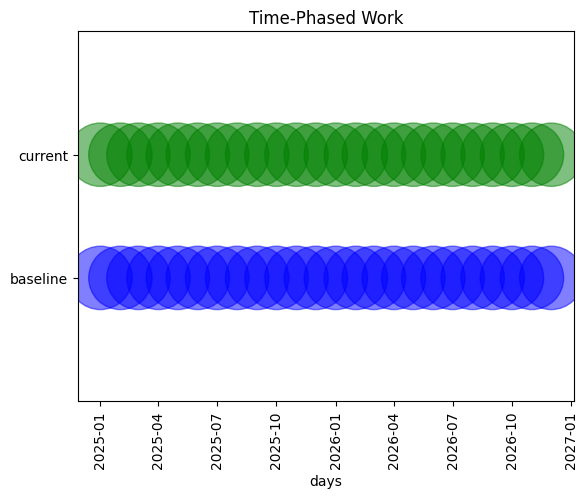

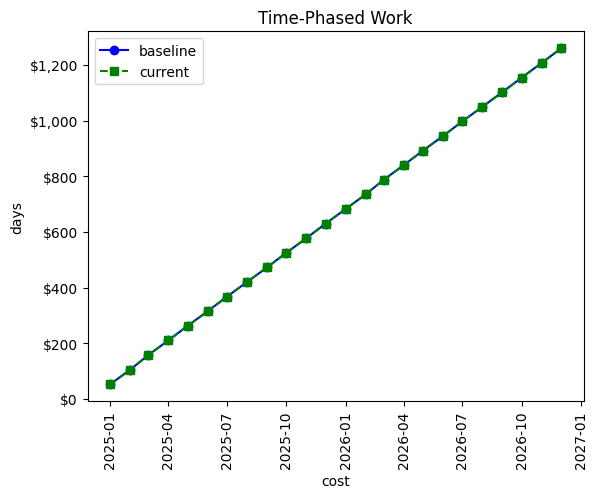

In [106]:
filter_column_array = ['Item']
filter_value_array = [20001]

prep_import_data(df,filter_column_array,filter_value_array)




C:\Users\CassieLynn\AppData\Local\Temp\ipykernel_16836\3103321895.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values('Need Date', inplace=True)


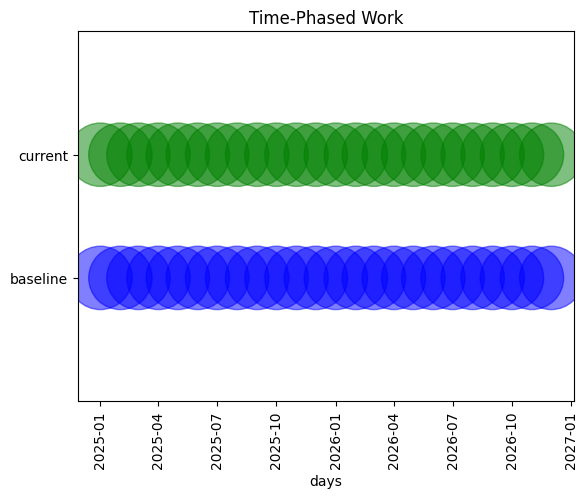

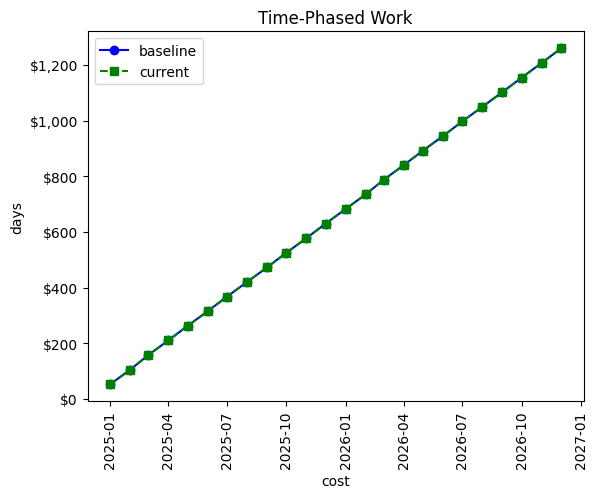

In [107]:
filter_column_array = ['Item']
filter_value_array = [20001]

x_values_fmt_1, x_values_fmt_2, y_values_1,  y_values_2, y_value_cum_1, y_value_cum_2 = prep_import_data(df,filter_column_array,filter_value_array)
#print(x_values_fmt_1)
#print(x_values_fmt_2)
#print(y_values_1)
#print(y_values_2)
#print(y_value_cum_1)
#print(y_value_cum_2)

today = pd.Timestamp(date.today())
calculate_EVM(today, x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2)
